<a href="https://colab.research.google.com/github/CheeseZyDev1/Google-Colab/blob/main/pima_predict_webapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
from keras import Sequential
from keras.layers import Dense

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
pima = pd.read_csv(io.BytesIO(uploaded['pima.csv']))

Saving pima.csv to pima.csv


In [ ]:
pima.head(5)

,NT,Plasma glucose,DB pressure,TS Thickness,Serum,Boday mass index,Dp Function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#Splitting the data into training and test test
X = pima.iloc[:,0:8].values
Y = pima.iloc[:,8].values # attribute 4 is label data


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)


from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:
print(X_train)

[[ 0.93691372  0.91091809  0.45982725 ...  0.40708356  0.66479969
   1.76634642]
 [ 0.04601433 -0.74783062 -0.47073225 ... -0.48135115 -0.08720986
  -0.95646168]
 [-1.14185152  1.38037527  1.08020025 ...  2.57740266 -0.13553176
  -0.87137393]
 ...
 [ 0.04601433 -0.84172205 -0.2122435  ... -0.92556851 -0.97814487
  -1.04154944]
 [ 2.12477957 -1.12339636  0.25303625 ... -0.24020459 -0.51908683
   0.14967911]
 [ 0.3429808   0.47275805  0.66661825 ... -4.06047387  0.50775352
   3.04266271]]


In [ ]:
print(Y_train)

[1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1
 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 1 

# Softmax
Softmax function เข้าใจง่าย ๆ ว่า Softmax รับตัวเลขเข้าไป แล้วแปลงออกมาเป็น Probability Softmax มักถูกนำไปไว้ Layer สุดท้าย ของ Neural Network เพื่อให้ Output ออกมาเป็น Probability

# ระหว่าง Softmax กับ Sigmoid ฟังก์ชั่นทั้งสองอันไหนดีกว่า
ตอบ: ขึ้นอยู๋กับคลาสงาน ถ้าเป็นงานทางด้าน multiclass classification จะนิยมใช้ Softmax แต่จริงๆ ทั้งสอง function ใช้กับงาน multiclass ได้ ขึ้นอยู่กับ architecture ของ NN ของเรา เช่น ถ้าเราต้องการแค่ค่า maximum เป้าหมายอย่างเดียวเช่นแยกภาพ หมา แมว กระต่าย softmax เป็นทางเลือกที่ง่ายกว่า แต่ถ้าต้องการคำตอบแบบเป็น ranking กรณีที่คำตอบมันอาจจะเป็นก้ำกึ่งๆระหว่างคลาสได้เช่น แยกพันธ์หมา แล้วมีพวกพันธ์ที่คล้ายกันอยู่มากเช่น พันธ์ชิบะ อาคิตะ คอร์กิ (multiclass relevance) sigmoid จะช่วยให้เราจัดอันดับแร้งค์กิ้งได้ดีกว่า

# Stochastic Gradient Descent(SGD)  
เป็นอัลกอริทึมที่อัพเดทค่าพารามิเตอร์ในทุกๆชุดข้อมูลฝึกฝน เป็นอัลกอริทึมที่ค่อนข้างไว อัพเดทแค่ครั้งเดียวต่อการเทรน 1 รอบ

In [ ]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

classifier = Sequential()

classifier.add(Dense(8, activation='relu', kernel_initializer='random_normal', input_dim=8))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#classifier.fit(X_train,y_train, batch_size=10, epochs=)
history = classifier.fit(X_train, Y_train, batch_size=10, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
62/62 [==============================] - 1s 6ms/step - loss: 0.6901 - accuracy: 0.6368 - val_loss: 0.6843 - val_accuracy: 0.6948
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.6384 - val_loss: 0.6694 - val_accuracy: 0.7078
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 0.6596 - accuracy: 0.7231 - val_loss: 0.6300 - val_accuracy: 0.7857
Epoch 4/50
62/62 [==============================] - 0s 3ms/step - loss: 0.6150 - accuracy: 0.7557 - val_loss: 0.5670 - val_accuracy: 0.8052
Epoch 5/50
62/62 [==============================] - 0s 3ms/step - loss: 0.5601 - accuracy: 0.7590 - val_loss: 0.5047 - val_accuracy: 0.7987
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 0.5180 - accuracy: 0.7557 - val_loss: 0.4652 - val_accuracy: 0.7922
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.7573 - val_loss: 0.4443 - val_accuracy: 0.7922
Epoch 8/50
62/62 [==

In [ ]:
eval_model = classifier.evaluate(X_train, Y_train)
print(eval_model)
score = classifier.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

20/20 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.7915
[0.44977810978889465, 0.791530966758728]
Train loss :  0.44977810978889465
Train accuracy :  0.791530966758728


In [ ]:
score1 = classifier.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.4489802122116089
Test accuracy :  0.7922077775001526


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


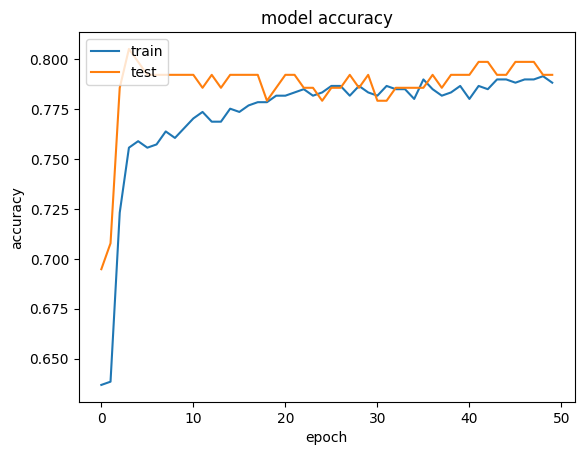

In [ ]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [ ]:
Y_pred = classifier.predict(X_test)
#Y_pred = (Y_pred > 0.5)
Y_pred = (Y_pred > 0.5).astype("int32")

NameError: ignored

In [ ]:
print(Y_pred)

[[1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[75 32]
 [ 8 39]]


# save model

In [ ]:
classifier.save("pima_modelx.h5")
print('saved pima model to disk')

saved pima model to disk


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import pickle
Pkl_Filename = "pima_modelx.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(classifier, file)

# Load model

In [ ]:
from numpy import loadtxt
from keras.models import load_model
#load model
model = load_model('/content/pima_modelx.h5')
#summaize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import pickle

# Now you can use the pickle module
pickled_model = pickle.load(open('pima_modelx.pkl', 'rb'))
pickled_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Load Unseen

In [ ]:
#uploaded = files.upload()
#udata = pd.read_csv(io.BytesIO(uploaded['iris_unseen.csv']))
#Xnew= udata.iloc[:,0:4]

#Xnew

# classify unseen

In [ ]:
#
#yacc= pickled_model.predict(Xnew)
#yacc
#

In [ ]:
#classes_x=np.argmax(yacc,axis=-1) #majority vote from the prediction

#for i in range(len(classes_x)):
  #print("The label of unsenn data is ", yacc[i], '\t', classes_x[i])

# Deploying your model on web application
เราจะใช้ ngrok ในการ delopy model ขึ้นดังนั้น ก่อนจะทำการ deploy จะต้องมีการติดตั้งและการ authen  token  ก่อน ให้สมัครสมาชิกและทำการ generate token ขึ้นมา
ไปที่ https://dashboard.ngrok.com/login

In [ ]:
pip install flask-ngrok

In [ ]:
from google.colab import drive
drive.mount('/content/drive') #ระวังเครื่องหมาย ‘ กับ ' ต่างกันนะคะ

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/web_pima

/content/drive/MyDrive/Colab Notebooks/web_pima


# Import required packages

In [ ]:
from flask_ngrok import run_with_ngrok
from flask import Flask, request, render_template
import pickle
import numpy as np

In [ ]:
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=040bc68f034c8f279833b277c680e5dac509fec8ca0e57cdd5d31cb9cff6e8c7
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2WcvyKasSig77tLvTCXyAoSKUjR_adXaJSooD1MpRqDSLn42

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


# Create Flask application

In [ ]:
from keras.models import load_model

app = Flask(__name__)

run_with_ngrok(app)

model = pickle.load(open('pima_modelx.pkl','rb'))

@app.route('/')
def home():
    return render_template('indexo.html')

@app.route('/predict', methods=["POST"])

def predict():
    if request.method == 'POST':
        NT = request.form['NT']
        Plasma_glucose = request.form['Plasma_glucose']
        DB_pressure = request.form['DB_pressure']
        TS_Thickness = request.form['TS_Thickness']
        Serum = request.form['Serum']
        body_mass_index = request.form['body_mass_index']
        Dp_Function = request.form['Dp_Function']
        Age = request.form['Age']


        sample_data = [Plasma_glucose, TS_Thickness, NT, DB_pressure,Serum,body_mass_index,Dp_Function,Age]
        clean_data = [float(i) for i in sample_data]

        final_input = np.array(clean_data).reshape(1,-1)
        print(final_input)


        real_input = sc.transform(final_input)

        prediction = model.predict(real_input)
        result_class= (prediction > 0.5).astype("int32") #majority vote from the prediction
        print(prediction)
        print("predictedclass ",result_class)

    return render_template('indexo.html',result_prediction=result_class)

app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://12c6-35-196-159-113.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [18/Oct/2023 15:04:25] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [18/Oct/2023 15:04:26] "GET /favicon.ico HTTP/1.1" 404 -


[[148.     35.      6.     72.      0.     33.6     0.627  50.   ]]
1/1 [==============================] - 0s 57ms/step


INFO:werkzeug:127.0.0.1 - - [18/Oct/2023 15:04:47] "POST /predict HTTP/1.1" 200 -


[[0.9721664]]
predictedclass  [[1]]
[[85.    29.     1.    66.     0.    26.6    0.351 31.   ]]
1/1 [==============================] - 0s 21ms/step


INFO:werkzeug:127.0.0.1 - - [18/Oct/2023 15:05:15] "POST /predict HTTP/1.1" 200 -


[[0.5837145]]
predictedclass  [[1]]
[[89.    23.     1.    66.    94.    28.1    0.167 21.   ]]
1/1 [==============================] - 0s 22ms/step


INFO:werkzeug:127.0.0.1 - - [18/Oct/2023 15:07:17] "POST /predict HTTP/1.1" 200 -


[[0.26588953]]
predictedclass  [[0]]


In [ ]:
from keras.models import load_model

app = Flask(__name__)

run_with_ngrok(app)

model = pickle.load(open('pima_modelx.pkl','rb'))

@app.route('/')
def home():
    return render_template('indexo.html')

@app.route('/predict', methods=["POST"])

def predict():
    if request.method == 'POST':
        NT = request.form['NT']
        Plasma_glucose = request.form['Plasma_glucose']
        DB_pressure = request.form['DB_pressure']
        TS_Thickness = request.form['TS_Thickness']
        Serum = request.form['Serum']
        body_mass_index = request.form['body_mass_index']
        Dp_Function = request.form['Dp_Function']
        Age = request.form['Age']


        sample_data = [Plasma_glucose, TS_Thickness, NT, DB_pressure,Serum,body_mass_index,Dp_Function,Age]
        clean_data = [float(i) for i in sample_data]

        final_input = np.array(clean_data).reshape(1,-1)
        print(final_input)


        real_input = sc.transform(final_input)

        prediction = model.predict(real_input)
        result_class= (prediction > 0.5).astype("int32") #majority vote from the prediction
        print(prediction)
        print("predictedclass ",result_class)

    return render_template('indexo.html',result_prediction=result_class)

app.run()